In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

df = pd.read_csv("/Users/kellyg/csds312-project-1/emotional_wellbeing.csv") 

df["Addicted"] = (df["Daily_Usage_Time (minutes)"] > 120).astype(int)

# Step 3: Preprocess features
numeric_features = ["Age", "Daily_Usage_Time (minutes)", "Posts_Per_Day",
                    "Likes_Received_Per_Day", "Comments_Received_Per_Day", "Messages_Sent_Per_Day"]
categorical_features = ["Gender", "Platform"]

# Target
y = df["Addicted"]

# Step 4: Build preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(), categorical_features)
])

#preprocess/split
X = df[numeric_features + categorical_features]
X_processed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)

#NEURAL NETWORK
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#train
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=4,
    callbacks=[early_stop],
    verbose=1
)

#evaluate
y_pred = (model.predict(X_test) > 0.5).astype(int)
print("\nNeural Network Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Epoch 1/50


/Users/kellyg/.pyenv/versions/3.10.13/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6851 - loss: nan - val_accuracy: 0.8214 - val_loss: nan
Epoch 2/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.7895 - loss: nan - val_accuracy: 0.8214 - val_loss: nan
Epoch 3/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - accuracy: 0.7711 - loss: nan - val_accuracy: 0.8214 - val_loss: nan
Epoch 4/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.7585 - loss: nan - val_accuracy: 0.8214 - val_loss: nan
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

Neural Network Accuracy: 0.7674418604651163
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       231
           1       0.00      0.00      0.00        70

    accuracy                           0.77       301
   macro avg       0.38      0.50      0.43       301
weighted avg       0.59      0.77      0.67       301



/Users/kellyg/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kellyg/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kellyg/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

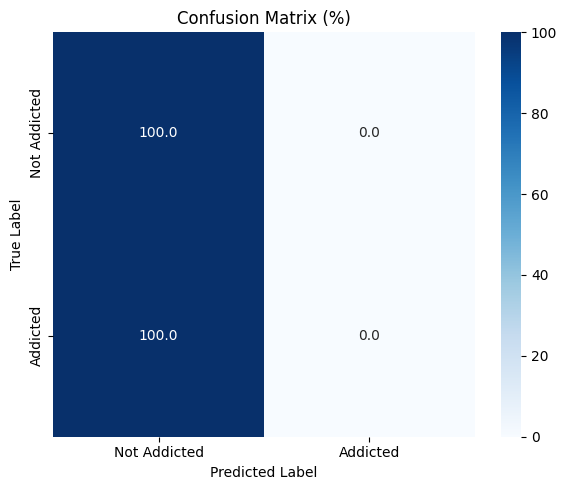

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix (absolute values)
cm = confusion_matrix(y_test, y_pred)

# Convert to percentage (optional)
cm_percent = cm.astype('float') / cm.sum(axis=1, keepdims=True) * 100

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Blues',
            xticklabels=["Not Addicted", "Addicted"],
            yticklabels=["Not Addicted", "Addicted"])
plt.title("Confusion Matrix (%)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

Epoch 1/50


/Users/kellyg/.pyenv/versions/3.10.13/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5569 - loss: 0.6724 - val_accuracy: 0.9714 - val_loss: 0.3665
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9263 - loss: 0.3209 - val_accuracy: 0.9714 - val_loss: 0.1764
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9737 - loss: 0.1592 - val_accuracy: 0.9714 - val_loss: 0.0979
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9788 - loss: 0.0947 - val_accuracy: 0.9857 - val_loss: 0.0558
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9824 - loss: 0.0679 - val_accuracy: 0.9857 - val_loss: 0.0385
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9851 - loss: 0.0561 - val_accuracy: 1.0000 - val_loss: 0.0252
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9949 - loss: 0.0376 - val_accuracy: 1.0000 - val_loss: 0.0173
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9817 - loss: 0.0476 - val_accuracy: 1.0000 - val_loss: 0.0128
Epo

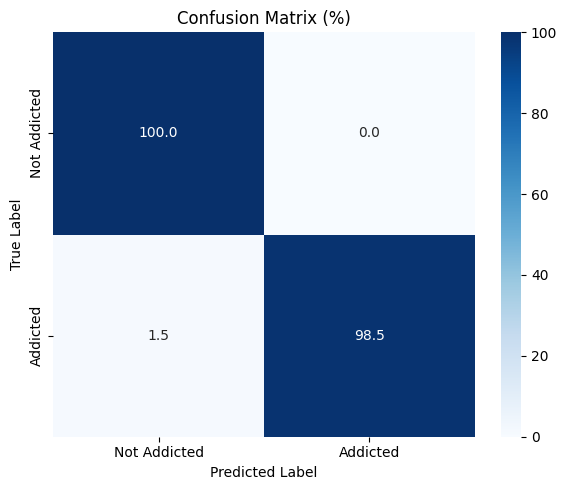

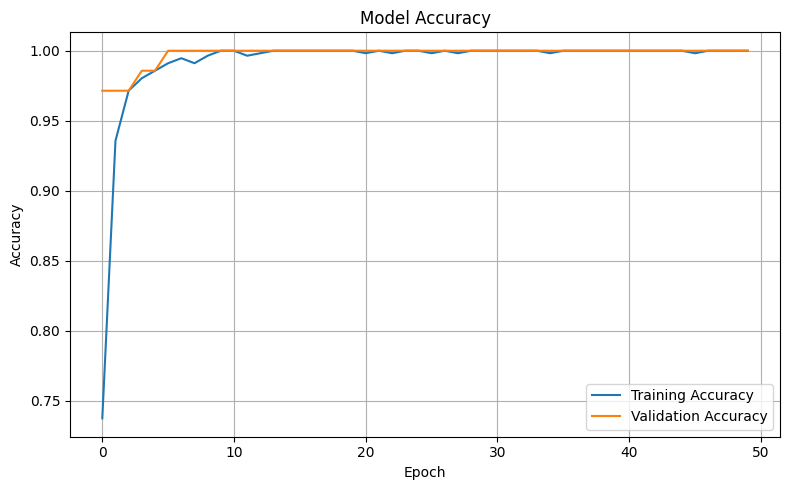

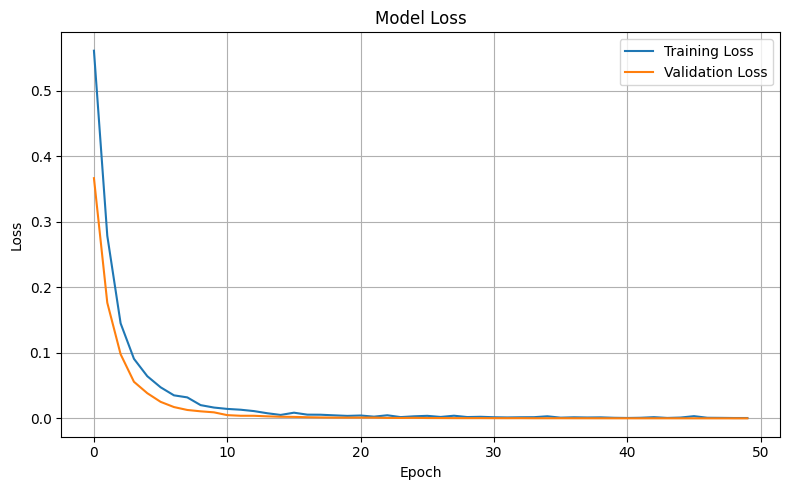

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

#load
df = pd.read_csv("train_cleaned.csv")  # Replace with your file path

# features
# be sure to not include daily usage time, or it will learn the rule >120 mins and just predict based on that
# and that would be data leakage which is bad
X = df.drop(columns=["User_ID", "Addicted", "Daily_Usage_Time (minutes)"])  
y = df["Addicted"]

#feature types
numeric_cols = ["Age", "Posts_Per_Day", "Likes_Received_Per_Day", 
                "Comments_Received_Per_Day", "Messages_Sent_Per_Day"]
categorical_cols = ["Gender", "Platform", "Dominant_Emotion"]

#ColumnTransformer for scaling + encoding
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Fit and transform data
X_processed = preprocessor.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)

#NEURAL NETWORK
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

#train
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

#evaluate
y_pred = (model.predict(X_test) > 0.5).astype(int)

print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred))
print("✅ Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_percent = cm.astype('float') / cm.sum(axis=1, keepdims=True) * 100

plt.figure(figsize=(6, 5))
sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Blues',
            xticklabels=["Not Addicted", "Addicted"],
            yticklabels=["Not Addicted", "Addicted"])
plt.title("Confusion Matrix (%)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

#curves
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Accuracy ended being very high, so I wanted to double check the model was being correctly trained

In [10]:
print(np.unique(y_test, return_counts=True))

(array([0, 1]), array([234,  66]))


In [16]:
print("NaNs in y_test:", np.isnan(y_test).sum())
print("NaNs in y_proba:", np.isnan(y_proba).sum())

NaNs in y_test: 0
NaNs in y_proba: 301


Epoch 1/50


/Users/kellyg/.pyenv/versions/3.10.13/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7902 - loss: 0.5096 - val_accuracy: 0.9786 - val_loss: 0.2633
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9430 - loss: 0.2292 - val_accuracy: 0.9714 - val_loss: 0.1264
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9716 - loss: 0.1272 - val_accuracy: 0.9857 - val_loss: 0.0704
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9890 - loss: 0.0624 - val_accuracy: 0.9857 - val_loss: 0.0451
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9833 - loss: 0.0775 - val_accuracy: 1.0000 - val_loss: 0.0308
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9868 - loss: 0.0467 - val_accuracy: 0.9857 - val_loss: 0.0330
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9881 - loss: 0.0353 - val_accuracy: 1.0000 - val_loss: 0.0176
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9998 - loss: 0.0209 - val_accuracy: 1.0000 - val_loss: 0.0132
Epo

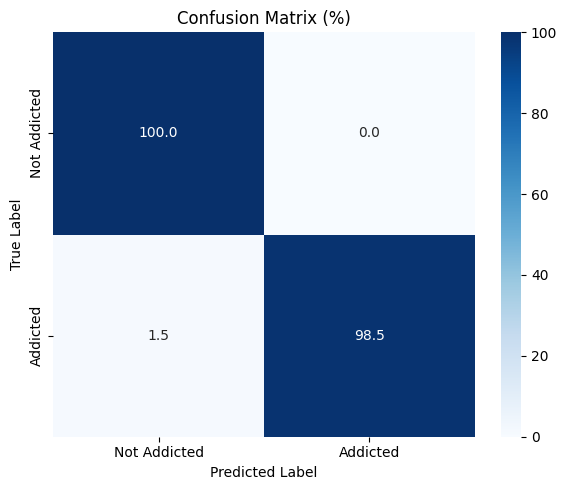

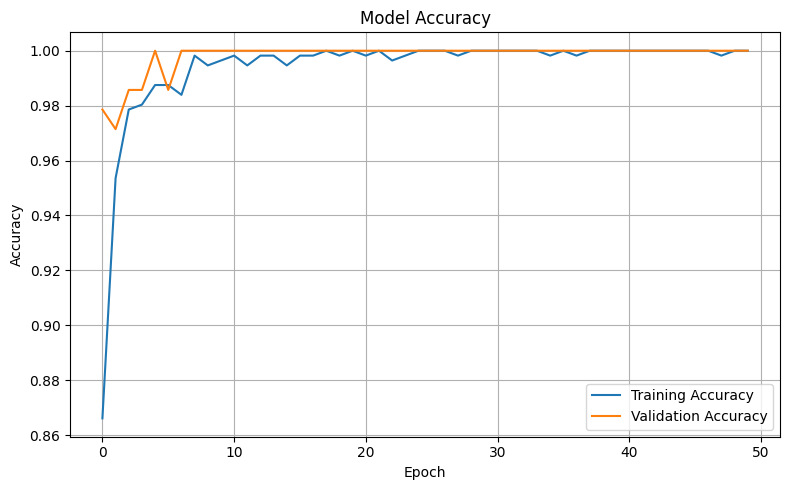

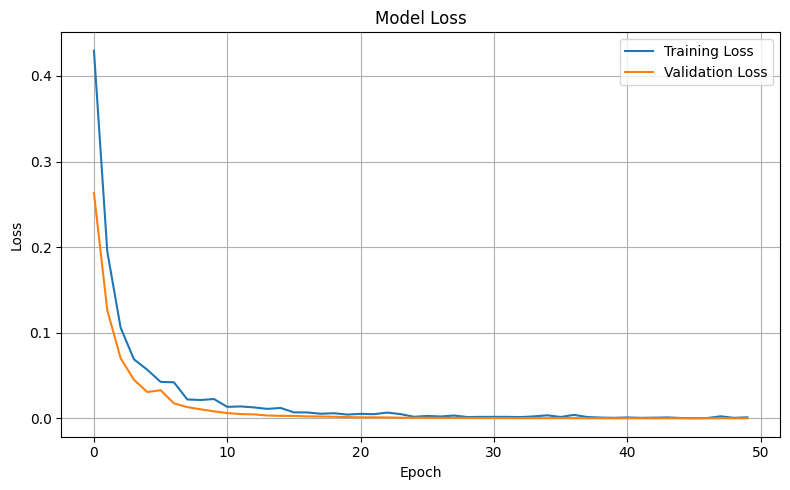

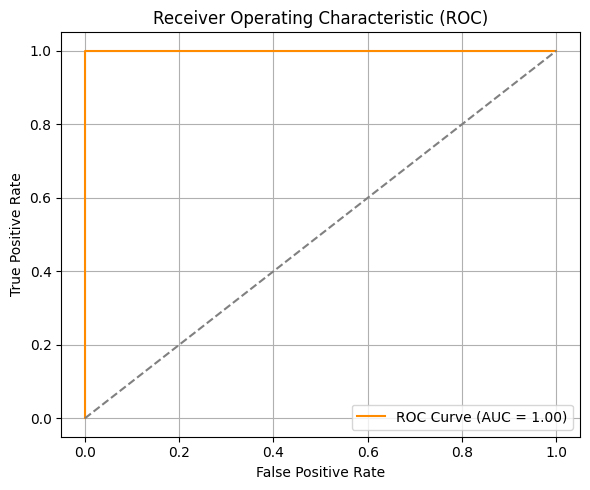

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# ----------------------------
# Step 1: Load Data
# ----------------------------
df = pd.read_csv("train_cleaned.csv")

# Define label
y = df["Addicted"]

# Drop features that cause leakage or aren't needed
X = df.drop(columns=["User_ID", "Addicted", "Daily_Usage_Time (minutes)"])

# ----------------------------
# Step 2: Clean numeric features
# ----------------------------
numeric_cols = ["Age", "Posts_Per_Day", "Likes_Received_Per_Day", 
                "Comments_Received_Per_Day", "Messages_Sent_Per_Day"]

categorical_cols = ["Gender", "Platform", "Dominant_Emotion"]

# Replace inf with NaN and fill NaNs with median (numeric only)
df[numeric_cols] = df[numeric_cols].replace([np.inf, -np.inf], np.nan)
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# ----------------------------
# Step 3: Preprocessing
# ----------------------------
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

X = df[numeric_cols + categorical_cols]
X_processed = preprocessor.fit_transform(X)

# Convert to dense array if sparse
X_processed = X_processed.toarray() if hasattr(X_processed, "toarray") else X_processed

# ----------------------------
# Step 4: Train-Test Split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.3, random_state=42
)

# ----------------------------
# Step 5: Neural Network
# ----------------------------
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

# ----------------------------
# Step 6: Evaluation
# ----------------------------
y_proba = model.predict(X_test).ravel()
y_pred = (y_proba > 0.5).astype(int)

print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred))
print("✅ Accuracy:", accuracy_score(y_test, y_pred))

# ----------------------------
# Step 7: Confusion Matrix
# ----------------------------
cm = confusion_matrix(y_test, y_pred)
cm_percent = cm.astype('float') / cm.sum(axis=1, keepdims=True) * 100

plt.figure(figsize=(6, 5))
sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Blues',
            xticklabels=["Not Addicted", "Addicted"],
            yticklabels=["Not Addicted", "Addicted"])
plt.title("Confusion Matrix (%)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# ----------------------------
# Step 8: Learning Curves
# ----------------------------
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------------------------
# Step 9: ROC Curve
# ----------------------------
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Receiver Operating Characteristic (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()